## Multiscale analysis of spatial correlation between 2 signals

In [19]:
from tapenade.analysis.spatial_correlation import (
    SpatialCorrelationPlotter
)
from pathlib import Path
import tifffile
import matplotlib.pyplot as plt
import numpy as np
from tapenade.preprocessing._preprocessing import change_array_pixelsize,normalize_intensity

### 1. Data loading

Load your the two signals that you wish to study the correlation between. If raw image data is loaded, the correlation will be studied at the smallest scale (voxel). To study the correlation at larger scales, we recommend applying our masked gaussian filter method, as presented in the `masked_gaussian_smoothing` notebook.

In [ ]:
folder = ...
path_to_signal = Path(folder) / '2k_Hoechst_FoxA2_Oct4_Bra_78h/big/data/1.tif'
path_to_mask =  Path(folder) / '2k_Hoechst_FoxA2_Oct4_Bra_78h/big/masks/1_mask.tif'
path_to_labels = Path(folder) / '2k_Hoechst_FoxA2_Oct4_Bra_78h/big/segmentation/1_seg.tif'
mask = tifffile.imread(path_to_mask)
labels = tifffile.imread(path_to_labels)
signal = tifffile.imread(path_to_signal)
hoechst = signal[:,0,:,:]
foxa2 = signal[:,1,:,:]
oct4 = signal[:,2,:,:]
bra = signal[:,3,:,:]

In [ ]:
oct4 = change_array_pixelsize(oct4, input_pixelsize=(1,0.6,0.6))
foxa2 = change_array_pixelsize(foxa2, input_pixelsize=(1,0.6,0.6))
hoechst = change_array_pixelsize(hoechst, input_pixelsize=(1,0.6,0.6))
mask = (change_array_pixelsize(mask, input_pixelsize=(1,0.6,0.6),order=0)).astype(int)
labels = (change_array_pixelsize(labels, input_pixelsize=(1,0.6,0.6),order=0)).astype(int)

foxa2_norm = normalize_intensity(foxa2,ref_image=hoechst,image_wavelength=488,sigma=11)
oct4_norm = normalize_intensity(oct4,ref_image=hoechst,image_wavelength=555,sigma=11)

(286, 521, 567) (286, 521, 567)
(286, 313, 340) (286, 313, 340)


In [16]:
import napari
viewer = napari.Viewer()
viewer.add_image(foxa2*mask,name='foxa2',colormap='gray_r')
viewer.add_image(oct4*mask,name='Oct4',colormap='gray_r')
viewer.add_image(foxa2_norm*mask,name='foxa2_norm',colormap='gray_r')
viewer.add_image(oct4_norm*mask,name='oct4_norm',colormap='gray_r')

for l in viewer.layers:
    l.data = np.transpose(l.data, (1, 0, 2))

viewer.grid.enabled = True
viewer.grid.shape = (2, 2)
viewer.grid.stride = -1

napari.run()

### 2. Initializing the plotter

Initializing the plotter once allows you to test several parameters of the visualization without reprocessing the data.

In [17]:
spatial_correlation_plotter_oct4_foxa2_norm = SpatialCorrelationPlotter(
    quantity_X=oct4_norm,
    quantity_Y=foxa2_norm,
    mask=mask,
    labels=labels,

)
spatial_correlation_plotter_oct4_foxa2 = SpatialCorrelationPlotter(
    quantity_X=oct4,
    quantity_Y=foxa2,
    mask=mask,
    labels=labels,

)

Plot the correlation:

C:\Users\gros\AppData\Local\Temp\ipykernel_24500\2102965923.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


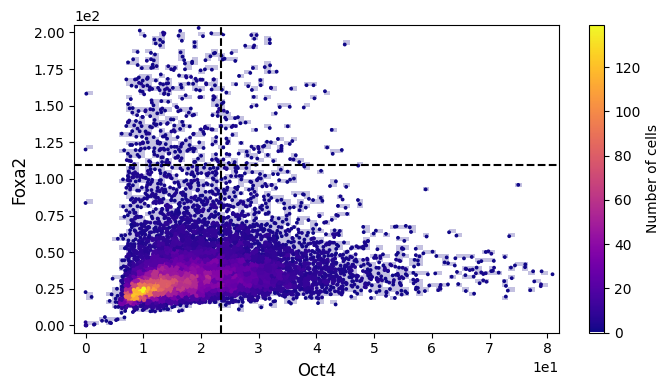

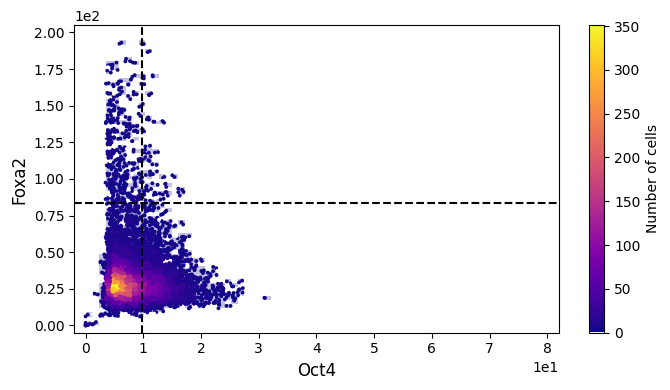

In [ ]:
lim_foxa2=200
lim_oct4=80
bins=70
fig, ax = spatial_correlation_plotter_oct4_foxa2.get_heatmap_figure(
    show_linear_fit=False,
    show_individual_cells=True,
    display_quadrants=True,
    bins=[bins,bins],
    extent_X = (0,lim_oct4),
    extent_Y = (0,lim_foxa2),
    label_X='Oct4',
    label_Y='Foxa2',
)
plt.savefig(Path(folder)/ 'S8g_unnormalized.png',dpi=300)
fig, ax = spatial_correlation_plotter_oct4_foxa2_norm.get_heatmap_figure(
    show_linear_fit=False,
    
    show_individual_cells=True,
    display_quadrants=True,
    bins=[bins,bins],
    extent_X = (0,lim_oct4),
    extent_Y = (0,lim_foxa2),
    label_X='Oct4',
    label_Y='Foxa2',
)

fig.show()
plt.savefig(Path(folder)/ 'S8g_normalized.png',dpi=300)

The function `get_heatmap_figure` returns a figure and axis object that can be used to further customize the plot. The figure can be saved to a file using the `savefig` method of the figure object.

The function has many parameters that can be used to customize the plot:

In [21]:
help(SpatialCorrelationPlotter.get_heatmap_figure)

Help on function get_heatmap_figure in module tapenade.analysis.spatial_correlation._spatial_correlation_plotter:

get_heatmap_figure(self, bins: tuple = (40, 40), show_individual_cells: bool = False, show_linear_fit: bool = True, normalize_quantities: bool = False, extent_X: tuple = None, extent_Y: tuple = None, percentiles_X: tuple = (0, 100), percentiles_Y: tuple = (0, 100), log_scale_X: bool = False, log_scale_Y: bool = False, figsize: tuple = (7, 4), label_X: str = 'X', label_Y: str = 'Y', colormap: str = 'plasma', sample_fraction: float = 0.005, display_quadrants: bool = False, fig_ax_tuple: tuple = None)
    Create a heatmap of the spatial correlation between two quantities X and Y.
    
    Parameters:
    - bins: list of two integers, number of bins in each dimension
    - show_individual_cells: bool, if True and if labels was specified in __init__,
        individual cells will be displayed as a scatter plot on top of the heatmap.
    - show_linear_fit: bool, if True, a linea